# Интервалы доверия

In [15]:
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Интервал для пропорции

In [11]:
norm.ppf(0.975)

1.959963984540054

In [12]:
p = 0.52

In [13]:
n=150

In [14]:
p - norm.ppf(0.975)*np.sqrt(p*(1-p)/n)

0.4400488431751296

In [15]:
np.sqrt(p*(1-p)/n)

0.040792156108742275

In [16]:
p + norm.ppf(0.975)*np.sqrt(p*(1-p)/n)

0.5999511568248704

## Визуализация интервала для одного значения

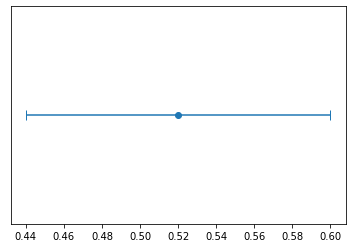

In [25]:
y = 1
x = 0.52
dx = norm.ppf(0.975)*np.sqrt(p*(1-p)/n)
plt.errorbar(x, y, xerr=dx, fmt='o',capsize=5)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

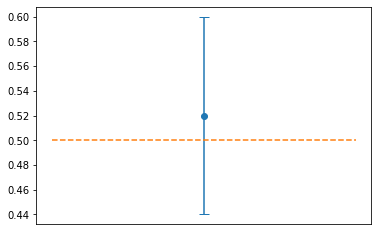

In [39]:
x = 1
y = 0.52
dy = norm.ppf(0.975)*np.sqrt(p*(1-p)/n)
plt.errorbar(x, y, yerr=dy, fmt='o',capsize=5)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
xr = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1])
yr = np.ones(len(xr))*0.5
plt.plot(xr,yr,'--');

## Пример: доверительный интервал ожидания для распределения Гаусса

Генерируем данные, где мы точно знаем правду

In [20]:
test_data = stats.norm.rvs(loc=12, scale=4, size=30,random_state=42)

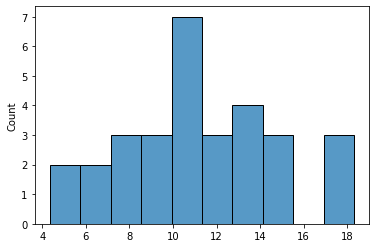

In [21]:
sns.histplot(test_data, bins=10)

**Точечная оценка мат. ожидания**

In [22]:
mu = test_data.mean()
print(mu)

11.247412416595852


In [23]:
print(np.std(test_data,ddof=1))

3.6000257096096453


**Интервальная оценка для мат. ожидания $\alpha=0.05$**

In [24]:
alpha=0.05

In [25]:
conf_err = stats.t.ppf(1-alpha/2,df=29)*np.std(test_data,ddof=1)/np.sqrt(30)

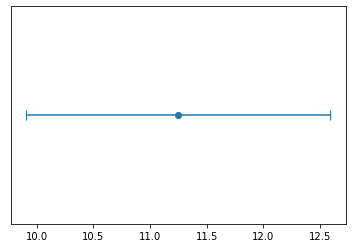

In [26]:
y = 1
x = mu
dx = conf_err
plt.errorbar(x, y, xerr=dx, fmt='o',capsize=5)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

## Визуализация интервалов для многих значений

В этот момент не важно, как мы генерируем данные

In [45]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters

gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std  # 2*sigma ~ 95% confidence region

Здесь видно, как генерируются интервалы

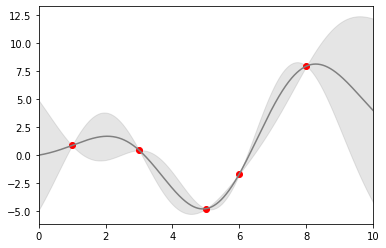

In [46]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);